In [37]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [38]:
expensas = pd.read_csv("../../data/interim/expensas.csv")

c:\users\smaldonado\documents\tfm\venv\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
expensas.shape

(283574, 42)

In [40]:
expensas.dtypes

id                                 int64
unidad_id                          int64
propietario_id                     int64
inquilino_id                       int64
fecha_vencimiento_1               object
fecha_vencimiento_2               object
vencimiento_fijado                object
fecha_emision                     object
monto                            float64
monto_total                      float64
monto_parcial                    float64
saldo_utilizado_en_pago          float64
monto_descuento                  float64
interes_pagado                   float64
monto_old                        float64
interes_pagado_old               float64
monto_parcial_old                float64
diferencia_pago                  float64
expensa_padre_id                   int64
int_dia                          float64
int_mes                          float64
mes                                int64
anio                               int64
unidad_denominacion               object
unidad_prop     

In [41]:
expensas.id = expensas.id.map(str)
expensas.unidad_id = expensas.unidad_id.map(str)
expensas.propietario_id = expensas.propietario_id.map(str)
expensas.inquilino_id = expensas.inquilino_id.map(str)
expensas.expensa_padre_id = expensas.expensa_padre_id.map(str)
expensas.unidad_prop = expensas.unidad_prop.map(str)
expensas.consorcio_id = expensas.consorcio_id.map(str)
expensas.id_consorcio = expensas.id_consorcio.map(str)
expensas.usuario_creador_id = expensas.usuario_creador_id.map(str)
expensas.concepto_id = expensas.concepto_id.map(str)
expensas.mes = expensas.mes.map(str)
expensas.anio = expensas.anio.map(str)

expensas.fecha_vencimiento_1 = pd.to_datetime(expensas.fecha_vencimiento_1)
expensas.fecha_vencimiento_2 = pd.to_datetime(expensas.fecha_vencimiento_2)
expensas.fecha_emision = pd.to_datetime(expensas.fecha_emision, errors="coerce")

In [42]:
expensas.describe().T

,count,mean,std,min,25%,50%,75%,max
monto,283574.0,1847.065733,1892.074545,0.33,700.43,1432.0,2484.45,68485.59
monto_total,283574.0,253893.093712,385647.843262,1.00,46490.58,109203.6,260467.99,3946655.44
monto_parcial,283574.0,29.448922,389.882304,-2103.64,0.00,0.0,0.00,35426.40
saldo_utilizado_en_pago,283574.0,0.000000,0.000000,0.00,0.00,0.0,0.00,0.00
monto_descuento,283574.0,0.000000,0.000000,0.00,0.00,0.0,0.00,0.00
interes_pagado,283574.0,4.697590,1825.401578,0.00,0.00,0.0,0.00,971887.62
monto_old,283574.0,27.683694,423.665150,0.00,0.00,0.0,0.00,35971.60
interes_pagado_old,283574.0,0.033645,2.664452,0.00,0.00,0.0,0.00,411.67
monto_parcial_old,283574.0,0.344043,31.850990,0.00,0.00,0.0,0.00,4089.74
diferencia_pago,283574.0,0.000000,0.000000,0.00,0.00,0.0,0.00,0.00


Hay algunas variables que no sirven porque son constantes o porque no interesan

In [43]:
columns_to_remove = ["deleted","porcentaje_pagomiscuentas", "porcentaje_rapipago", "porcentaje_costo_comisionista", "porcentaje_costo_eol", "costo_comisionista", "diferencia_pago", "monto_parcial_old", "interes_pagado_old", "monto_old", "monto_descuento", "saldo_utilizado_en_pago"]

In [44]:
expensas = expensas.drop(columns=columns_to_remove)

## Fecha de Emision

In [45]:
expensas["dia_fecha_emision"] = expensas.fecha_emision.dt.day
expensas["mes_fecha_emision"] = expensas.fecha_emision.dt.month
expensas["fecha_expensa"] = expensas.anio + '-' + expensas.mes + '-01'
expensas.fecha_expensa = pd.to_datetime(expensas.fecha_expensa)

In [50]:
expensas["emite_mes_anterior"] = expensas.fecha_emision < expensas.fecha_expensa

Text(0.5, 1.0, 'Distribución de día de fecha de emision')

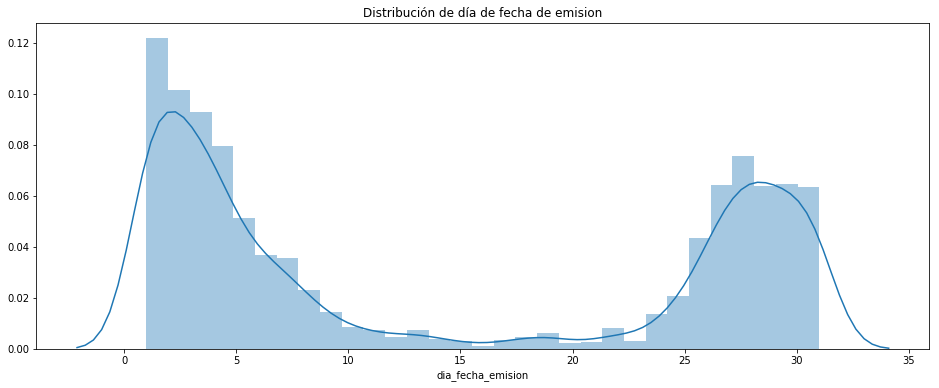

In [63]:
plt.figure(figsize=(16,6))
sns.distplot(expensas.loc[~expensas.dia_fecha_emision.isna(),"dia_fecha_emision"], bins=31)
plt.title("Distribución de día de fecha de emision")

Aqui se puede ver como las expensas se tienden a emitir a principio de mes, o a fines del mes anterior. Para corroborar eso, vamos a graficar separado si la fecha de emision corresponde al mes o al mes anterior

Text(0.5, 1.0, 'Distribución de día de fecha de emision - Mes Anterior')

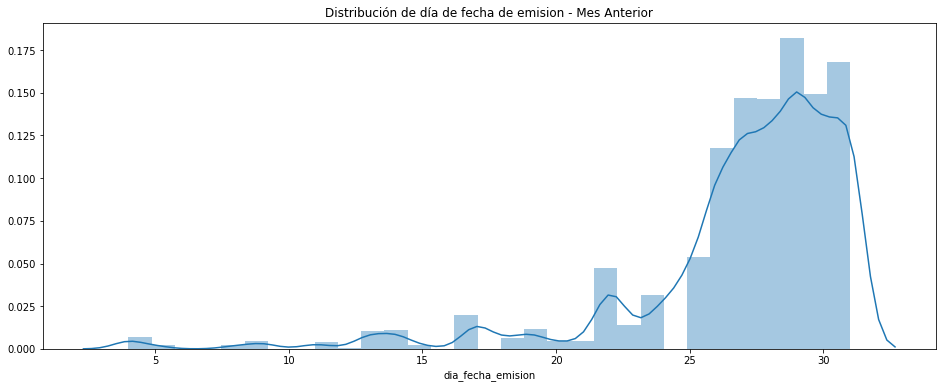

In [65]:
plt.figure(figsize=(16,6))
sns.distplot(expensas.loc[~expensas.dia_fecha_emision.isna() & expensas.emite_mes_anterior,"dia_fecha_emision"], bins=31)
plt.title("Distribución de día de fecha de emision - Mes Anterior")

Text(0.5, 1.0, 'Distribución de día de fecha de emision - Mismo Mes')

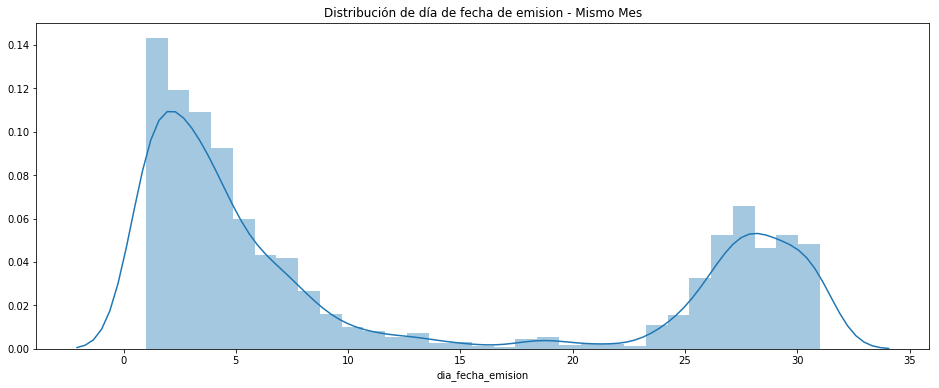

In [66]:
plt.figure(figsize=(16,6))
sns.distplot(expensas.loc[~expensas.dia_fecha_emision.isna() & (~expensas.emite_mes_anterior),"dia_fecha_emision"], bins=31)
plt.title("Distribución de día de fecha de emision - Mismo Mes")

Esto es un poco raro, se supone que si se genera en el mismo mes, deberia hacerse antes de la fecha de vencimiento.

In [69]:
expensas.loc[~expensas.dia_fecha_emision.isna() & (expensas.fecha_emision > expensas.fecha_vencimiento_1),:]

,id,unidad_id,propietario_id,inquilino_id,fecha_vencimiento_1,fecha_vencimiento_2,vencimiento_fijado,fecha_emision,monto,monto_total,...,concepto_id,usuario_creador_id,id_consorcio,modoPago,visibilidadGastos,tipo,dia_fecha_emision,mes_fecha_emision,fecha_expensa,emite_mes_anterior
7944,102848,38,83,0,2017-04-10,2017-04-20,NaN,2017-04-26 00:00:00,222.00,42921.00,...,1,0,8,mes_vencido,parcial,normal,26.0,4.0,2017-03-01,False
34940,102201,9930,0,0,2017-01-10,2017-01-20,NaN,2017-03-16 10:03:35,68.64,800.00,...,1,0,617,mes_adelantado,parcial,normal,16.0,3.0,2017-01-01,False
34941,102202,9931,0,0,2017-01-10,2017-01-20,NaN,2017-03-16 10:03:35,74.24,800.00,...,1,0,617,mes_adelantado,parcial,normal,16.0,3.0,2017-01-01,False
34942,102203,9932,0,0,2017-01-10,2017-01-20,NaN,2017-03-16 10:03:35,65.28,800.00,...,1,0,617,mes_adelantado,parcial,normal,16.0,3.0,2017-01-01,False
34943,102204,9933,0,0,2017-01-10,2017-01-20,NaN,2017-03-16 10:03:35,92.56,800.00,...,1,0,617,mes_adelantado,parcial,normal,16.0,3.0,2017-01-01,False
34944,102205,9934,0,0,2017-01-10,2017-01-20,NaN,2017-03-16 10:03:35,65.28,800.00,...,1,0,617,mes_adelantado,parcial,normal,16.0,3.0,2017-01-01,False
34945,102206,9935,0,0,2017-01-10,2017-01-20,NaN,2017-03-16 10:03:35,65.28,800.00,...,1,0,617,mes_adelantado,parcial,normal,16.0,3.0,2017-01-01,False
34946,102207,9936,0,0,2017-01-10,2017-01-20,NaN,2017-03-16 10:03:35,134.48,800.00,...,1,0,617,mes_adelantado,parcial,normal,16.0,3.0,2017-01-01,False
34947,102208,9937,0,0,2017-01-10,2017-01-20,NaN,2017-03-16 10:03:35,32.08,800.00,...,1,0,617,mes_adelantado,parcial,normal,16.0,3.0,2017-01-01,False
34948,102209,9938,0,0,2017-01-10,2017-01-20,NaN,2017-03-16 10:03:36,119.44,800.00,...,1,0,617,mes_adelantado,parcial,normal,16.0,3.0,2017-01-01,False


### Fechas de Vencimiento

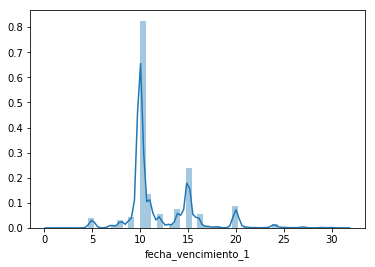

In [77]:
sns.distplot(expensas.fecha_vencimiento_1.dt.day)

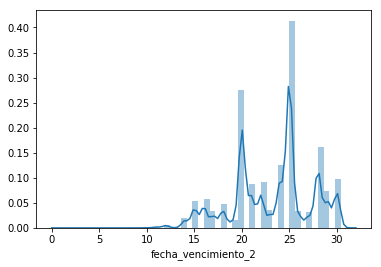

In [78]:
sns.distplot(expensas.fecha_vencimiento_2.dt.day)

In [107]:
def jitter(serie, jitter=0.1):
    noise = np.random.uniform(-jitter/2, jitter/2, len(serie))
    return serie+noise

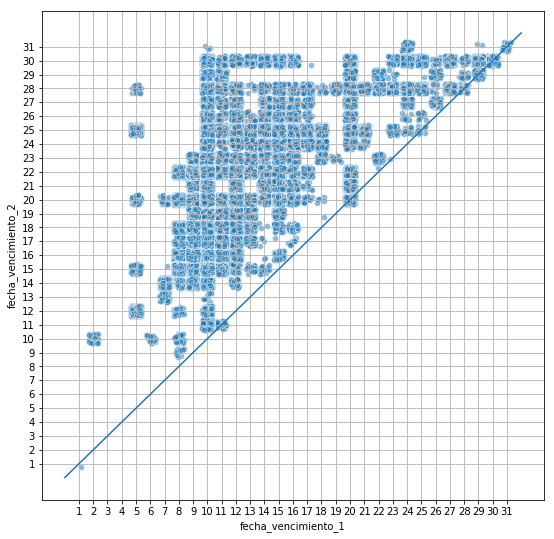

In [121]:
plt.figure(figsize=(9,9))
plt.plot([0,32],[0,32])
plt.grid(True, "both")
plt.xticks(range(1,32))
plt.yticks(range(1,32))
sns.scatterplot(x=jitter(expensas.fecha_vencimiento_1.dt.day, 0.7), y =jitter(expensas.fecha_vencimiento_2.dt.day, 0.7), alpha=0.5)

Hay algunos casos en que la fecha de vencimiento 1 y la fecha de vencimiento 2 es la misma

In [125]:
expensas.loc[expensas.fecha_emision.isna(), "fecha_emision"] = pd.to_datetime(expensas.anio + '-' + expensas.mes + '-01')

In [136]:
expensas["dias_a_vencimiento_1"] = (expensas.fecha_vencimiento_1 - expensas.fecha_emision).dt.total_seconds() / (24 * 60 * 60)
expensas["dias_a_vencimiento_2"] = (expensas.fecha_vencimiento_2 - expensas.fecha_emision).dt.total_seconds() / (24 * 60 * 60)

In [145]:
expensas.loc[expensas.dias_a_vencimiento_1 > 60,["id","consorcio_nombre","modoPago","fecha_vencimiento_1", "fecha_vencimiento_2", "fecha_emision", "dias_a_vencimiento_1", "dias_a_vencimiento_2"]]

,id,consorcio_nombre,modoPago,fecha_vencimiento_1,fecha_vencimiento_2,fecha_emision,dias_a_vencimiento_1,dias_a_vencimiento_2
5296,60920,Complejo Magdalena,mes_vencido,2017-03-10,2017-03-20,2016-07-01 00:00:00,252.000000,262.000000
10994,1513,Test Vencido 28/3,mes_vencido,2014-06-10,2014-06-20,2014-03-01 00:00:00,101.000000,111.000000
10995,1514,Test Vencido 28/3,mes_vencido,2014-06-10,2014-06-20,2014-03-01 00:00:00,101.000000,111.000000
10996,1515,Test Vencido 28/3,mes_vencido,2014-06-10,2014-06-20,2014-03-01 00:00:00,101.000000,111.000000
10997,1516,Test Vencido 28/3,mes_vencido,2014-08-10,2014-08-20,2014-04-01 00:00:00,131.000000,141.000000
10998,1517,Test Vencido 28/3,mes_vencido,2014-08-10,2014-08-20,2014-04-01 00:00:00,131.000000,141.000000
10999,1518,Test Vencido 28/3,mes_vencido,2014-08-10,2014-08-20,2014-04-01 00:00:00,131.000000,141.000000
16806,79438,Altos del Río,mes_vencido,2017-05-10,2017-05-20,2016-10-01 00:00:00,221.000000,231.000000
28772,111120,ACONCAGUA,mes_adelantado,2017-09-15,2017-09-24,2017-05-03 13:02:03,134.456910,143.456910
35284,9197,COMPLEJO DON BOSCO,mes_vencido,2015-12-10,2015-12-20,2014-12-01 00:00:00,374.000000,384.000000


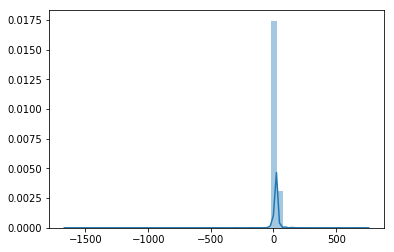

In [135]:
sns.distplot((expensas.fecha_vencimiento_1 - expensas.fecha_emision).dt.total_seconds() / (24 * 60 * 60))

## Monto

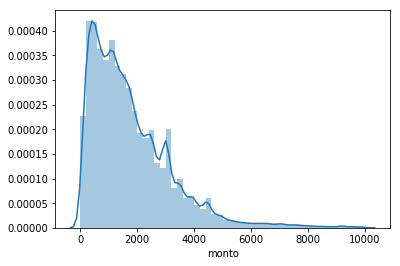

In [149]:
sns.distplot(expensas.loc[expensas.monto<10000,"monto"])

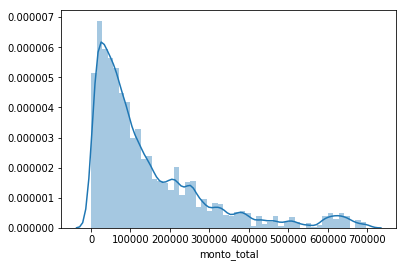

In [153]:
sns.distplot(expensas.loc[expensas.monto_total<700000,"monto_total"])

In [164]:
expensas["proporcion"] = expensas.monto*100/expensas.monto_total

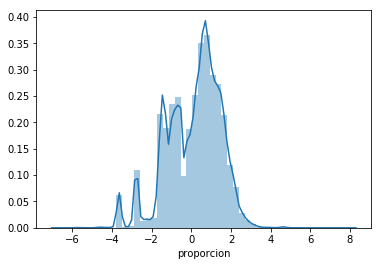

In [170]:
sns.distplot(np.log(expensas.proporcion))

Seria bueno tomar el logaritmo entonces, es mas representativo

In [161]:
expensas.loc[expensas.monto > expensas.monto_total, ["id", "unidad_id", "consorcio_nombre","fecha_expensa","monto_total", "monto_parcial", "monto"]]

,id,unidad_id,consorcio_nombre,fecha_expensa,monto_total,monto_parcial,monto
95288,36662,25269,CONS. DE PROP. DEL EDIFICIO ARVIAL,2015-11-01,658.50,9.97,659.00
95289,36665,25272,CONS. DE PROP. DEL EDIFICIO ARVIAL,2015-11-01,1231.60,0.00,1232.00
95290,36669,25276,CONS. DE PROP. DEL EDIFICIO ARVIAL,2015-11-01,739.60,0.00,740.00
95291,36672,25279,CONS. DE PROP. DEL EDIFICIO ARVIAL,2015-11-01,739.60,57.39,740.00
95292,36674,25281,CONS. DE PROP. DEL EDIFICIO ARVIAL,2015-11-01,1231.60,53.77,1232.00
95293,36675,25282,CONS. DE PROP. DEL EDIFICIO ARVIAL,2015-11-01,739.60,0.00,740.00
138282,82011,27969,Pontevea,2012-10-01,271.20,0.00,328.60
138283,82017,27969,Pontevea,2013-04-01,306.00,0.00,414.00
138284,82018,27969,Pontevea,2013-05-01,306.00,0.00,467.71
138285,82019,27969,Pontevea,2013-06-01,306.00,0.00,414.00


In [163]:
expensas.loc[(expensas.consorcio_nombre == "Pontevea") & (expensas.fecha_expensa == "2018-08-01")]

,id,unidad_id,propietario_id,inquilino_id,fecha_vencimiento_1,fecha_vencimiento_2,vencimiento_fijado,fecha_emision,monto,monto_total,...,id_consorcio,modoPago,visibilidadGastos,tipo,dia_fecha_emision,mes_fecha_emision,fecha_expensa,emite_mes_anterior,dias_a_vencimiento_1,dias_a_vencimiento_2
139382,286271,27944,6028,6779,2018-08-15,2018-08-25,NaN,2018-08-02 14:05:36,1413.0,106000.0,...,1533,mes_adelantado,parcial,normal,2.0,8.0,2018-08-01,False,12.412778,22.412778
139383,286272,27945,6029,0,2018-08-15,2018-08-25,NaN,2018-08-02 14:05:36,1442.0,106000.0,...,1533,mes_adelantado,parcial,normal,2.0,8.0,2018-08-01,False,12.412778,22.412778
139384,286273,27946,6030,6361,2018-08-15,2018-08-25,NaN,2018-08-02 14:05:36,2233.0,106000.0,...,1533,mes_adelantado,parcial,normal,2.0,8.0,2018-08-01,False,12.412778,22.412778
139385,286276,27947,6028,0,2018-08-15,2018-08-25,NaN,2018-08-02 14:05:36,2245.0,106000.0,...,1533,mes_adelantado,parcial,normal,2.0,8.0,2018-08-01,False,12.412778,22.412778
139386,286278,27948,6032,0,2018-08-15,2018-08-25,NaN,2018-08-02 14:05:36,3250.0,106000.0,...,1533,mes_adelantado,parcial,normal,2.0,8.0,2018-08-01,False,12.412778,22.412778
139387,286280,27949,6033,0,2018-08-15,2018-08-25,NaN,2018-08-02 14:05:36,3326.0,106000.0,...,1533,mes_adelantado,parcial,normal,2.0,8.0,2018-08-01,False,12.412778,22.412778
139388,286282,27950,6034,0,2018-08-15,2018-08-25,NaN,2018-08-02 14:05:37,972.0,106000.0,...,1533,mes_adelantado,parcial,normal,2.0,8.0,2018-08-01,False,12.412766,22.412766
139389,286284,27951,6035,6460,2018-08-15,2018-08-25,NaN,2018-08-02 14:05:37,1029.0,106000.0,...,1533,mes_adelantado,parcial,normal,2.0,8.0,2018-08-01,False,12.412766,22.412766
139390,286286,27952,6036,0,2018-08-15,2018-08-25,NaN,2018-08-02 14:05:37,1010.0,106000.0,...,1533,mes_adelantado,parcial,normal,2.0,8.0,2018-08-01,False,12.412766,22.412766
139391,286288,27953,6034,6461,2018-08-15,2018-08-25,NaN,2018-08-02 14:05:37,977.0,106000.0,...,1533,mes_adelantado,parcial,normal,2.0,8.0,2018-08-01,False,12.412766,22.412766


## Intereses

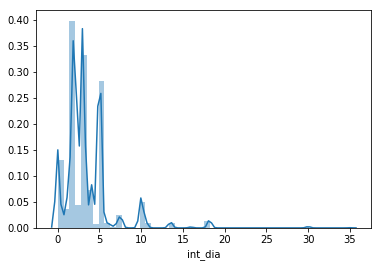

In [174]:
sns.distplot(expensas.int_dia)

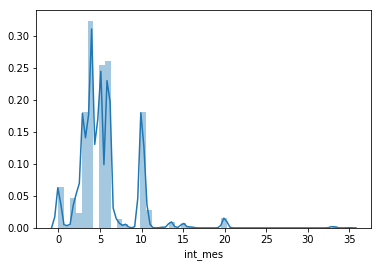

In [175]:
sns.distplot(expensas.int_mes)

In [176]:
expensas.columns

Index(['id', 'unidad_id', 'propietario_id', 'inquilino_id',
       'fecha_vencimiento_1', 'fecha_vencimiento_2', 'vencimiento_fijado',
       'fecha_emision', 'monto', 'monto_total', 'monto_parcial',
       'interes_pagado', 'expensa_padre_id', 'int_dia', 'int_mes', 'mes',
       'anio', 'unidad_denominacion', 'unidad_prop', 'consorcio_id',
       'consorcio_nombre', 'consorcio_admin', 'costo_eol', 'version',
       'concepto_id', 'usuario_creador_id', 'id_consorcio', 'modoPago',
       'visibilidadGastos', 'tipo', 'dia_fecha_emision', 'mes_fecha_emision',
       'fecha_expensa', 'emite_mes_anterior', 'dias_a_vencimiento_1',
       'dias_a_vencimiento_2', 'proporcion'],
      dtype='object')